In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

In [19]:
url = "https://raw.githubusercontent.com/natihuri1/spotifyProject/main/spotifyProject.csv"
spotify_df = pd.read_csv(url)


In [20]:
spotify_df

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,Electronic,Zomboy,Young & Dangerous - Gentlemens Club Remix,4iL7kCCiy2FjGFqxUGmA2K,29,0.00661,0.573,240000,0.784,0.130000,F,0.2640,-4.047,Minor,0.0421,145.042,4/4,0.163
39996,39996,Electronic,MC Hammer,Intro: Turn This Mutha Out,4X8EsIbtmKCyBaxhm21EHh,24,0.01010,0.864,140434,0.916,0.050600,C#,0.3500,-11.031,Major,0.0483,111.141,4/4,0.919
39997,39997,Electronic,Air,Au fond du rêve doré,6dacsOp1V5oI22BQ2wZxfq,35,0.71500,0.451,121880,0.541,0.764000,G,0.1720,-8.018,Major,0.0271,103.123,3/4,0.234
39998,39998,Electronic,Bent,Strictly Bongo,5fGuXPBg1hwskIq6B7aRye,30,0.04340,0.597,322173,0.556,0.008730,G,0.1810,-10.872,Major,0.0477,80.004,4/4,0.552


In [21]:
spotify_df.dtypes

Unnamed: 0            int64
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [22]:
spotify_df.isnull().sum()

Unnamed: 0          0
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### לא קיימים ערכים חסרים בדאטה שלנו

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

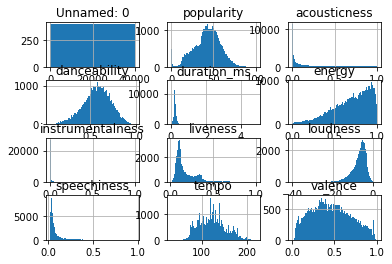

In [23]:
spotify_df.hist(bins=100)

In [24]:
print(spotify_df.popularity.max())

100


In [25]:
popular_songs = spotify_df[spotify_df.popularity > 70]
not_popular = spotify_df[(spotify_df.popularity < 80) & (spotify_df.popularity > 20)]
#spotify_df.loc[spotify_df['popularity'] < 57, 'popularity'] = 0
#spotify_df.loc[spotify_df['popularity'] >= 57, 'popularity'] = 1
#not_popular_songs = spotify_df[spotify_df['popularity'] == 0]
#popular_songs = spotify_df[spotify_df['popularity'] == 1]

### נמיין את הנתונים לשתי סוגים מוצלח/לא מוצלח
##### מוצלח - פופלריות מעל 80
##### לא מוצלח - פופלריות בין 20 ל-80 
שירים שהפופלריות שלהם מתחת ל20 לא בהכרח מושפעים ממרכיבי השיר אלה מגורמים אחרים ( חוסר חשיפה ) לכן בהשוואה נרצה להשוות בין שירים שקיבלו חשיפה ולא הצליחו לשירים שקיבלו חשיפה והצליחו 

In [26]:
popular_songs

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145,145,R&B,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,71,0.735000,0.501,257733,0.378,0.0000,E,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178
147,147,R&B,Jason Derulo,Tip Toe (feat. French Montana),2z4pcBLQXF2BXKFvd0BuB6,76,0.023300,0.845,187521,0.709,0.0000,A#,0.0940,-4.547,Minor,0.0714,98.062,4/4,0.620
161,161,R&B,Rihanna,Hate That I Love You,7iu0WYLdo4yksKf3seaxzI,72,0.323000,0.637,218947,0.730,0.0000,F,0.0981,-5.380,Minor,0.0874,93.867,4/4,0.732
197,197,R&B,Tory Lanez,Pa Mi (with Ozuna),0CYLDwvvpJQySLA5CvqvSl,71,0.098300,0.596,216689,0.557,0.0000,C#,0.0565,-7.522,Minor,0.1340,133.247,5/4,0.661
225,225,R&B,Zara Larsson,Ain't My Fault,0ADG9OgdVTL7fgREP75BrZ,74,0.007780,0.576,224031,0.782,0.0000,F#,0.2850,-4.825,Minor,0.0296,141.153,4/4,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22202,22202,Electronic,DJ Snake,Magenta Riddim,4BiiDQtijdt0WdtiyIPhnO,74,0.000410,0.604,194490,0.897,0.8380,A#,0.3270,-3.678,Minor,0.0641,102.053,4/4,0.588
22217,22217,Electronic,Gaullin,Moonlight,0A5gdlrpAuQqZ2iFgnqBFW,79,0.052900,0.813,173067,0.761,0.0119,A#,0.3370,-5.687,Minor,0.0850,124.957,4/4,0.290
22228,22228,Electronic,The Prodigy,Breathe,5oPUBUzrAnwvlmMzl1VW7Y,71,0.009100,0.679,334800,0.822,0.8710,A,0.0388,-6.117,Major,0.0498,130.036,4/4,0.320
22268,22268,Electronic,Supergrass,Alright,5xC8uOesnn0udeXAYlAnoY,72,0.000479,0.467,180880,0.958,0.1990,E,0.2990,-4.808,Minor,0.0775,145.920,4/4,0.701


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

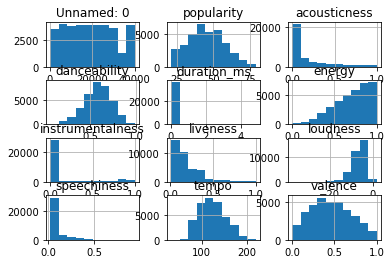

In [27]:
not_popular.hist(bins=10)

In [28]:
features = ['acousticness','danceability','energy','instrumentalness','speechiness','tempo','valence']

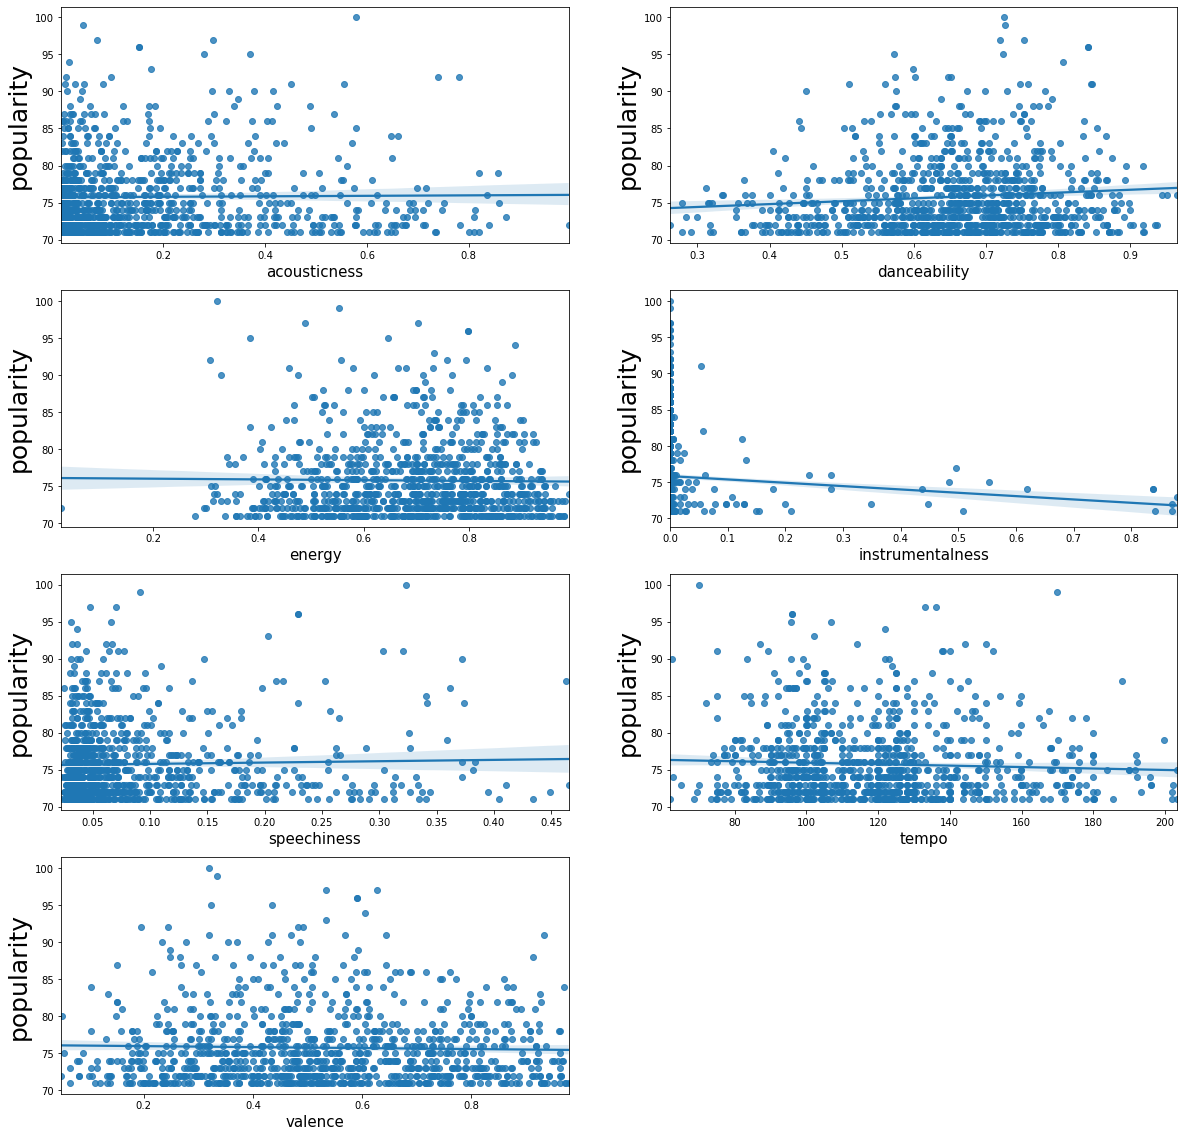

In [29]:
pltnum =1
plt.figure(figsize=(20,20))
for col in features:
    if pltnum <= len(features):
        ax = plt.subplot(4,2,pltnum)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Popularity', fontsize=25)
        sns.regplot(x=col, y='popularity', data=popular_songs)
    pltnum+=1
plt.show()

# We'll see if danceability affects the song's popularity
### נמיין את הנתונים לקבוצות לפי הפופלריות שלהם ולכול קבוצה נעשה ממוצע ל״אפשרי לריקוד״ על מנת להקל עלינו לבדוק את המתאם בין שתי הקבוצות

In [30]:
df_1=spotify_df.groupby('popularity')['danceability'].mean().sort_values(ascending=False).reset_index()
df_1

,popularity,danceability
0,96,0.841000
1,94,0.807000
2,97,0.735500
3,99,0.726000
4,100,0.725000
...,...,...
95,10,0.443067
96,7,0.433842
97,12,0.433827
98,9,0.390739


> לכול קבוצה ערך של פופלריות יש ממוצע של ״אפשרי לריקוד״

In [34]:
import plotly.express as px
fig2 = px.scatter(spotify_df, x="popularity", y="danceability", color="danceability",size='popularity')
fig2.show()

In [32]:
data1 = df_1['popularity']
data2 = df_1['danceability']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.909


> לפי הקרולציה הגבוה ניתן לראות שאכן יש קשר בין הצלחת השיר לאפשרות הריקוד 